WEEK 2 TASKS OVERVIEW

In this section, the libraries plotly, seaborn, and matplotlib were explored and tested on several datasets. The intructions given were to just play around with the given libraries so no specific goal was accomplished. However, I did try to at least plot some relevant data for a few of the data sets that would be considered important in the real world, they will be listed down below.

As for the final task, a dataset of images of penguins and turtles were given alongside their image information in a csv file. The goal was to read the file using pandas and sort the images according to their category id. Beyond that, a bit of exploring was done on image recognition using AI.

SETUP

libraries to be used are imported below.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import shutil

import numpy

TASK 1A

Dataset of coffee industries were explored here. Due to the fact that the dataset was too large, I decided to only take 25 coffee production companies to plot down. The first plot contains a pie chart showing how much contribution each company gives in making coffee in a unit of measurement: Number of bags.

The second plot contains a histogram comparing the bag weight produced by each company.

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\Akshay\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 37326 (\N{CJK UNIFIED IDEOGRAPH-91CE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Akshay\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29281 (\N{CJK UNIFIED IDEOGRAPH-7261}) missing from current font.
  func(*args, **kwargs)
C:\Users\Akshay\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20025 (\N{CJK UNIFIED IDEOGRAPH-4E39}) missing from current font.
  func(*args, **kwargs)
C:\Users\Akshay\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21654 (\N{CJK UNIFIED IDEOGRAPH-5496}) missing from current font.
  func(*args, **kwargs)
C:\Users\Akshay\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21857 (\N{CJK UNIFIED IDEOGRAPH-5561}) missing from current font.
  func(*args, **kwargs)
C:\Users\A

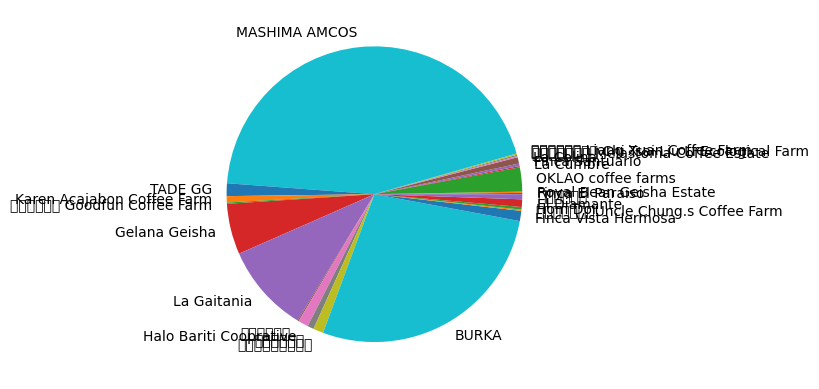

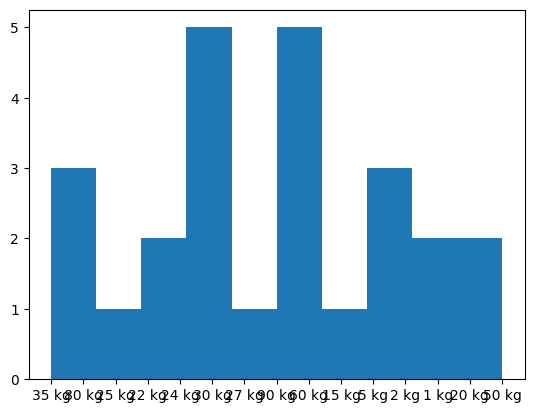

In [2]:
coffee_data = pd.read_csv('./df_arabica_clean.csv', nrows=25)
pie = plt.figure("1")
plt.pie(coffee_data['Number of Bags'], labels=coffee_data['Farm Name'])
histogram = plt.figure("2")
plt.hist(coffee_data['Bag Weight'])
plt.show

TASK 1B

In this dataset contained bank customers and info about their savings/earnings. The data I plotted contains a comparison of estimated salary depending on the age group of the people. In addition to that I split the plots based on gender. Only a 100 people were included for the data plotting.

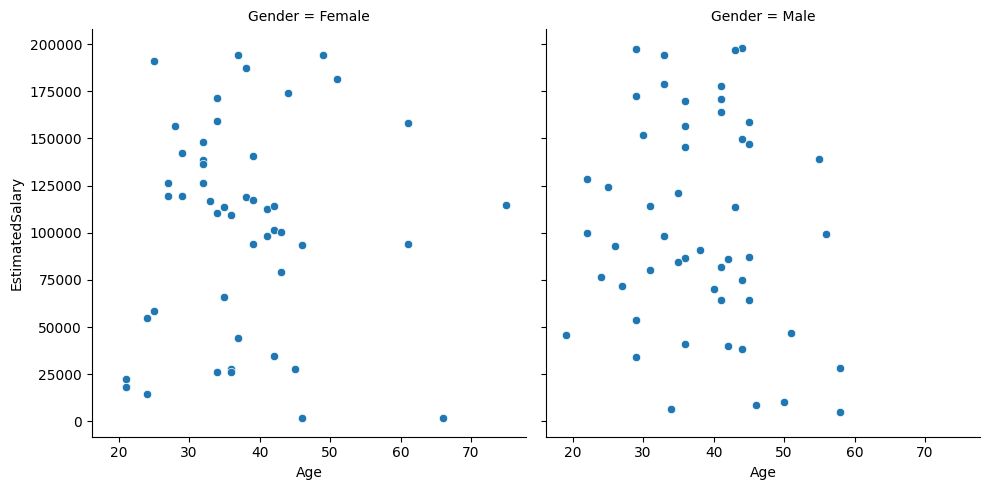

In [16]:
sns.set_theme
customer_data = pd.read_csv('./Customer-Churn-Records.csv', nrows=100)


sns.relplot(customer_data, x='Age', y='EstimatedSalary', col='Gender')

(array([ 8., 11.,  6.,  9., 14., 14.,  8., 12.,  8., 10.]),
 array([  1643.11 ,  21284.715,  40926.32 ,  60567.925,  80209.53 ,
         99851.135, 119492.74 , 139134.345, 158775.95 , 178417.555,
        198059.16 ]),
 <BarContainer object of 10 artists>)

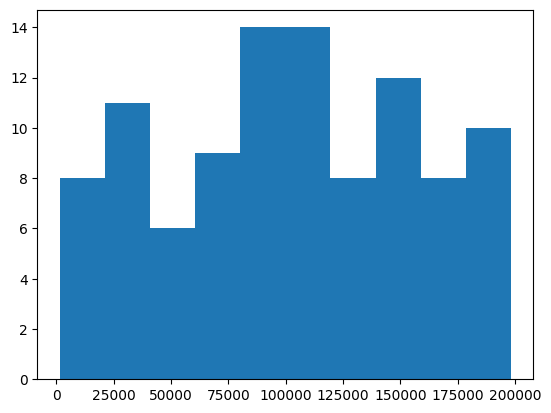

In [17]:
plt.hist(customer_data['EstimatedSalary'])

TASK 1C

Histogram plot of quantity of each type of locale in a hotel event dataset. Bar chart was represented after passing data from csv file into a dictionary.

<BarContainer object of 3 artists>

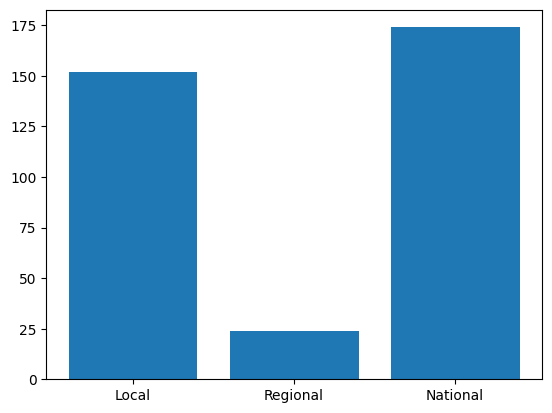

In [21]:
hotel_data = pd.read_csv('./holidays_events.csv')

dict = {'Local':0, 'Regional':0, 'National':0}
for data in hotel_data.locale:
    if data=='Local':
        dict['Local']+=1
    elif data == 'Regional':
        dict['Regional']+=1
    elif data == 'National':
        dict['National']+=1

plt.bar(dict.keys(), dict.values())

TASK 1D

A pie chart was made based on quantity of each type of flowers from an image dataset

      Flower  Quantity
0      Lilly       838
1      Lotus       552
2     Orchid       979
3  Sunflower       791
4      Tulip      1000


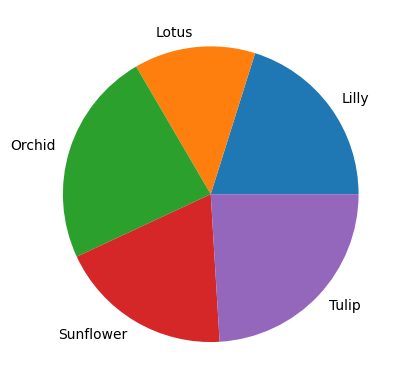

In [14]:
flowers = pd.DataFrame(columns=['Flower', 'Quantity'])

types_of_flowers = os.listdir('./flower_images/')
flowers['Flower'] = types_of_flowers

quantity_list = []
for types in types_of_flowers:
    quantity_list.append(len(os.listdir('./flower_images/'+types)))
flowers['Quantity'] = quantity_list

plt.pie(flowers['Quantity'], labels=flowers['Flower'])
print (flowers)

TASK 2A

In order for me to split the images based on whether the image contains a penguin or a turtle, I first have to read and store the data needed from the csv provided alongside the images. Therefore the image path was specified to the corresponding csv file, and then it was read using pandas library, and finally a dataframe was made that stored the category id of the image alongside their corresponding file path. Then a loop was made to run through the dataframe and sort them into folders depending on their category id. os library was used for file moving.

In [20]:
train = pd.read_json('./Images/train_annotations')
train_imgs = [f for f in os.listdir('./Images/train/') if os.path.isfile('./Images/train/'+f)]

df_train = pd.DataFrame(train_imgs, columns=['path'])
df_train['class']=train.category_id

try:
    os.makedirs('./Images/train/Penguins')
    os.makedirs('./Images/train/Turtles')
except:
    print("File already created")

i=0
try:
    for file in train_imgs:
        if df_train.loc[i].at["class"]==1:
            shutil.move('./Images/train/'+file, './Images/train/Penguins/')
        elif df_train.loc[i].at["class"]==2:
            shutil.move('./Images/train/'+file, './Images/train/Turtles/')
        df_train = df_train.drop(i)
        i=i+1
except:
    print("Files already moved")

In [8]:
valid = pd.read_json('./Images/valid_annotations')
valid_imgs = [f for f in os.listdir('./Images/valid/') if os.path.isfile('./Images/valid/'+f)]

df_valid = pd.DataFrame(valid_imgs, columns=['path'])
df_valid['class']=valid.category_id

try:
    os.makedirs('./Images/valid/Penguins')
    os.makedirs('./Images/valid/Turtles')
except:
    print("File already created")

i=0
try:
    for file in valid_imgs:
        if df_valid.loc[i].at["class"]==1:
            shutil.move('./Images/valid/'+file, './Images/valid/Penguins/')
        elif df_valid.loc[i].at["class"]==2:
            shutil.move('./Images/valid/'+file, './Images/valid/Turtles/')
        df_valid = df_valid.drop(i)
        i=i+1
except:
    print("Files already moved")

File already created


WEEK 2B

Finally a plot was produced to show the number of images of penguins vs the number of images of turtles in a pie chart.

([<matplotlib.patches.Wedge at 0x13d90395c10>,
 [Text(6.735557395310444e-17, 1.1, 'Penguins'),
  Text(-2.0206672185931328e-16, -1.1, 'Turtles')])

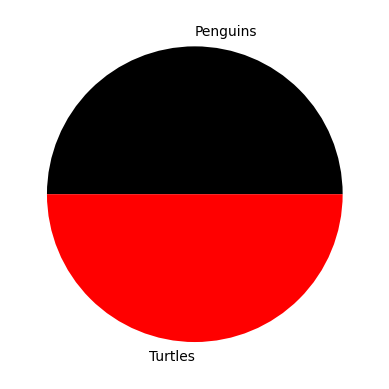

In [6]:
train_pie = plt.figure('train_pie')
colors = ['black', 'green']

penguins = len(os.listdir('./Images/train/Penguins/'))
turtles = len(os.listdir('./Images/train/Turtles/'))

data = [['Penguins', penguins], ['Turtles', turtles]]

df = pd.DataFrame(data, columns=['Animals', 'Count'])

plt.pie(df['Count'], labels=df['Animals'], colors=colors)